## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Sign up for <a href="https://developer.twitter.com/en/support/twitter-api/developer-account">a developer account in Twitter</a>
### D. Copy, paste and modify the python code file in the notebook

# Step 1: Install and Import Libraries

# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API

In [2]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [3]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  10


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  10
positive number:  3
negative number:  0
neutral number:  7


In [5]:
tweet_list[0:20]

,0
0,"RT @JL_MarceloP: Matutino en la @ss_ucm, #Cuba..."
1,RT @JL_MarceloP: Industria biofarmacéutica en ...
2,RT @JL_MarceloP: Brigada Internacional de Soli...
3,RT @JL_MarceloP: 16 ed. Jornadas contra la Hom...
4,@ss_ucm
5,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
6,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...
7,"RT @Multiverso_GK: Y así cierra, una de las me..."
8,下个月的更新内容暂定为更多的领带，同时会多一个材质球，毕竟当前的UV已经塞不下了（说真的如果...
9,La Psicología también nos da una visión del hu...


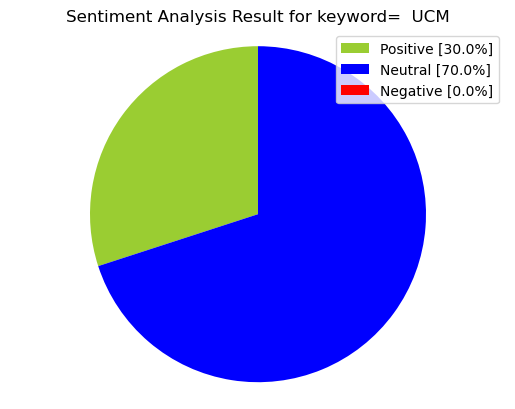

In [6]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [8]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,"RT @JL_MarceloP: Matutino en la @ss_ucm, #Cuba...","RT @JL_MarceloP: Matutino en la @ss_ucm, #Cuba..."
1,RT @JL_MarceloP: Industria biofarmacéutica en ...,RT @JL_MarceloP: Industria biofarmacéutica en ...
2,RT @JL_MarceloP: Brigada Internacional de Soli...,RT @JL_MarceloP: Brigada Internacional de Soli...
3,RT @JL_MarceloP: 16 ed. Jornadas contra la Hom...,RT @JL_MarceloP: 16 ed. Jornadas contra la Hom...
4,@ss_ucm,@ss_ucm
5,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
6,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...
7,"RT @Multiverso_GK: Y así cierra, una de las me...","RT @Multiverso_GK: Y así cierra, una de las me..."
8,下个月的更新内容暂定为更多的领带，同时会多一个材质球，毕竟当前的UV已经塞不下了（说真的如果...,下个月的更新内容暂定为更多的领带，同时会多一个材质球，毕竟当前的UV已经塞不下了（说真的如果...
9,La Psicología también nos da una visión del hu...,La Psicología también nos da una visión del hu...


In [9]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @JL_MarceloP: Matutino en la @ss_ucm, #Cuba...",matutino en la ucm cubaporlavida sancti...
1,RT @JL_MarceloP: Industria biofarmacéutica en ...,industria biofarmac utica en cuba reanuda alg...
2,RT @JL_MarceloP: Brigada Internacional de Soli...,brigada internacional de solidaridad primero ...
3,RT @JL_MarceloP: 16 ed. Jornadas contra la Hom...,16 ed jornadas contra la homofobia y la tra...
4,@ss_ucm,ucm
5,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm
6,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...,las brigadas t cnicas juveniles de la cmw t...
7,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...
8,下个月的更新内容暂定为更多的领带，同时会多一个材质球，毕竟当前的UV已经塞不下了（说真的如果...,uv ...
9,La Psicología también nos da una visión del hu...,la psicolog a tambi n nos da una visi n del hu...


In [10]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_21498/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @JL_MarceloP: Matutino en la @ss_ucm, #Cuba...",matutino en la ucm cubaporlavida sancti...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
1,RT @JL_MarceloP: Industria biofarmacéutica en ...,industria biofarmac utica en cuba reanuda alg...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
2,RT @JL_MarceloP: Brigada Internacional de Soli...,brigada internacional de solidaridad primero ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
3,RT @JL_MarceloP: 16 ed. Jornadas contra la Hom...,16 ed jornadas contra la homofobia y la tra...,0.0,0.0,positive,0.0,0.846,0.154,0.6124
4,@ss_ucm,ucm,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
5,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.5,0.5,positive,0.0,0.625,0.375,0.2023
6,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...,las brigadas t cnicas juveniles de la cmw t...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
7,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
8,下个月的更新内容暂定为更多的领带，同时会多一个材质球，毕竟当前的UV已经塞不下了（说真的如果...,uv ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
9,La Psicología también nos da una visión del hu...,la psicolog a tambi n nos da una visi n del hu...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000


In [11]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [12]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [13]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,8,80.0
positive,2,20.0


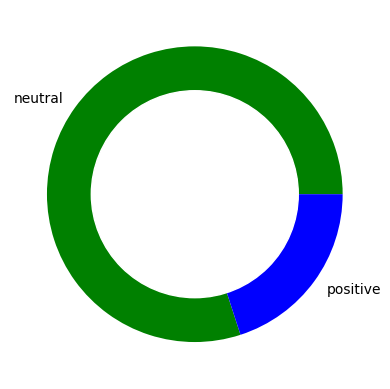

In [14]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [15]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



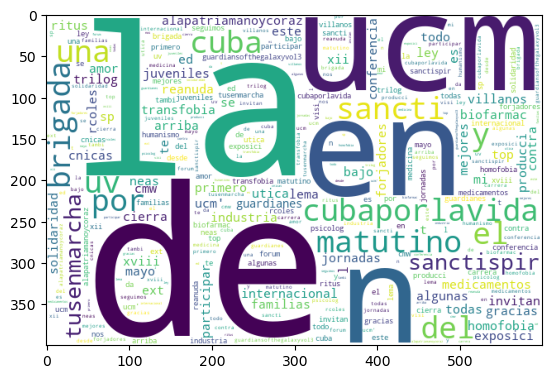

In [16]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

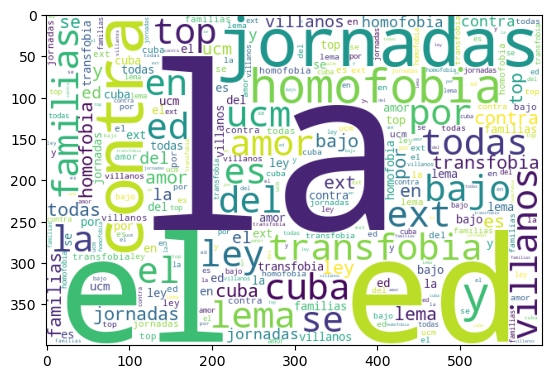

In [17]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

In [18]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

ValueError: We need at least 1 word to plot a word cloud, got 0.

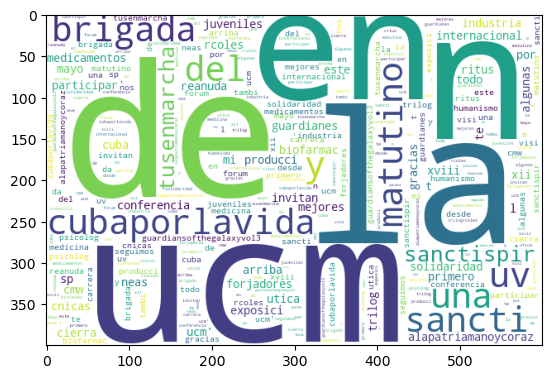

In [19]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)